In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/harshalgadhe/poem-generation/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  sanidhyak


Your Kaggle Key:

  ································


100%|██████████| 39.9k/39.9k [00:00<00:00, 41.0MB/s]

In [5]:
import os
from tqdm import tqdm
import tensorflow as tf
import numpy as np

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras import utils

In [7]:
tokenizer = preprocessing.text.Tokenizer()

In [11]:
dataset = open('/kaggle/working/poem-generation/poem.txt').read()

In [13]:
bag = dataset.lower().split("\n")

In [18]:
tokenizer.fit_on_texts(bag)
vocab = len(tokenizer.word_index)+1
print(vocab)

3808


In [19]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'in': 7, 'my': 8, 'me': 9, 'for': 10, 'you': 11, 'with': 12, 'that': 13, 'all': 14, 'is': 15, 'was': 16, 'but': 17, 'on': 18, 'she': 19, 'as': 20, 'it': 21, 'her': 22, 'love': 23, 'your': 24, 'when': 25, 'be': 26, 'not': 27, 'by': 28, 'are': 29, 'they': 30, 'from': 31, 'will': 32, 'no': 33, 'he': 34, 'one': 35, 'so': 36, 'or': 37, 'at': 38, 'old': 39, 'if': 40, 'oh': 41, 'his': 42, 'we': 43, 'ill': 44, 'what': 45, 'down': 46, 'there': 47, 'heart': 48, 'can': 49, 'now': 50, 'where': 51, 'never': 52, 'were': 53, 'this': 54, 'like': 55, 'thou': 56, 'their': 57, 'away': 58, 'said': 59, 'have': 60, 'young': 61, 'go': 62, 'know': 63, 'did': 64, 'night': 65, 'come': 66, 'then': 67, 'out': 68, 'them': 69, 'our': 70, 'had': 71, 'green': 72, 'its': 73, 'see': 74, 'fair': 75, 'day': 76, 'sweet': 77, 'take': 78, 'more': 79, 'who': 80, 'good': 81, 'would': 82, 'man': 83, 'o': 84, 'up': 85, 'world': 86, 'still': 87, 'ever': 88, 'town': 89, 'true

In [20]:
training_dataset = []

In [21]:
for i in tqdm(bag):
    i_token_list = tokenizer.texts_to_sequences([i])[0]
    print(i_token_list)
    for i in range(1, len(i_token_list)):
        ngram_i_token_list = i_token_list[:i+1]
        training_dataset.append(ngram_i_token_list)

100%|██████████| 2478/2478 [00:00<00:00, 36680.34it/s]

[266, 3, 59]
[4, 1, 987, 393]
[30, 988]
[57, 1555, 567]
[266, 3, 59, 4, 1, 1556]
[80, 725]
[266, 989]
[21, 1557]
[1558, 10, 9, 2, 726]
[266, 3, 59, 4, 8, 568]
[21, 346, 20, 5, 1559, 189]
[1560, 10, 5, 394]
[209, 1561, 4, 1562]
[266, 4, 1, 475]
[6, 1563, 395, 727]
[6, 1564, 1565]
[6, 1566, 2, 1567]
[21, 304, 121]
[12, 5, 728, 1568, 7, 729]
[266, 3, 59, 4, 8, 210]
[175, 569]
[267]
[176, 730]
[6, 990, 991]
[35, 105, 2, 1569]
[396, 237, 1570]
[6, 992, 1571, 14, 570]
[18, 1, 238, 1572, 993]
[1, 239, 305, 6, 1, 990, 994, 991]
[13, 29, 1573, 2, 1574, 396, 1575]
[7, 1, 1576, 177, 1577, 731]
[71, 4, 1578, 306, 732, 14, 57]
[178, 240]
[211]
[30, 1579, 347, 63, 40, 1580]
[1581]
[25, 1582, 994, 22, 995, 1583, 6, 1584]
[19, 996, 1, 1585, 307, 12, 1586]
[17, 25, 3, 397, 8]
[1587, 1588, 1589, 1590]
[396, 22, 997, 7, 5, 998]
[241, 1591, 1592]
[14, 19, 1593, 15, 5, 999]
[571]
[6, 1594, 1595]
[18, 5, 1596, 1597]
[1000, 1, 1598]
[6, 5, 1599, 1600]
[1001, 85, 572]
[15, 1002]
[28, 1, 1003]
[308, 1601]
[2, 

In [23]:
max_seq_len = max([len(i) for i in training_dataset])
print(max_seq_len)

16


In [24]:
training_dataset = np.array(preprocessing.sequence.pad_sequences(training_dataset, maxlen=max_seq_len, padding='pre'))

In [29]:
print(training_dataset.shape)
print(training_dataset[69])

(16311, 16)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    6
  992 1571]


In [30]:
trainX = training_dataset[:,:-1]
trainY = training_dataset[:,-1]

In [32]:
trainY = utils.to_categorical(trainY, num_classes=vocab)

In [36]:
model = keras.Sequential(
[
    layers.Embedding(vocab, 350, input_length=max_seq_len-1),
    layers.Bidirectional(layers.LSTM(200)),
    layers.Dense(vocab, activation='softmax'),
    
])

In [41]:
from tensorflow.keras import optimizers
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.Adam(0.01),
    metrics = ['accuracy']
)

In [62]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=0)

In [63]:
EPOCHS = 500

In [48]:
from matplotlib import pyplot as plt
def plot_graph(history, metric):
    plt.plot(history.history[metric])
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.show()

In [58]:
def generate_poem(line, no_of_words):
    for i in range(no_of_words):
        line_token_list = tokenizer.texts_to_sequences([line])[0]
        line_token_list = preprocessing.sequence.pad_sequences([line_token_list], maxlen=max_seq_len-1, padding='pre')
        next_word_index = np.argmax(model.predict(line_token_list), axis=-1)
        next_word = ""
        for word, index in tokenizer.word_index.items():
            if index==next_word_index:
                next_word = word
                break
        line += " " + next_word 
    print(line)
    

In [64]:
history = model.fit(trainX, trainY, epochs=EPOCHS, verbose=1, callbacks = [early_stopping])

Epoch 1/500
510/510 [==============================] - 4s 9ms/step - loss: 1.5770 - accuracy: 0.6898
Epoch 2/500
510/510 [==============================] - 4s 9ms/step - loss: 1.6041 - accuracy: 0.6854
Epoch 3/500
510/510 [==============================] - 5s 9ms/step - loss: 1.5854 - accuracy: 0.6855
Epoch 4/500
510/510 [==============================] - 4s 8ms/step - loss: 1.5871 - accuracy: 0.6889
Epoch 5/500
510/510 [==============================] - 4s 9ms/step - loss: 1.5439 - accuracy: 0.6953
Epoch 6/500
510/510 [==============================] - 4s 9ms/step - loss: 1.5374 - accuracy: 0.6990
Epoch 7/500
510/510 [==============================] - 4s 9ms/step - loss: 1.5032 - accuracy: 0.7033
Epoch 8/500
510/510 [==============================] - 4s 9ms/step - loss: 1.5117 - accuracy: 0.7035
Epoch 9/500
510/510 [==============================] - 4s 8ms/step - loss: 1.4678 - accuracy: 0.7069
Epoch 10/500
510/510 [==============================] - 5s 10ms/step - loss: 1.4575 - accur

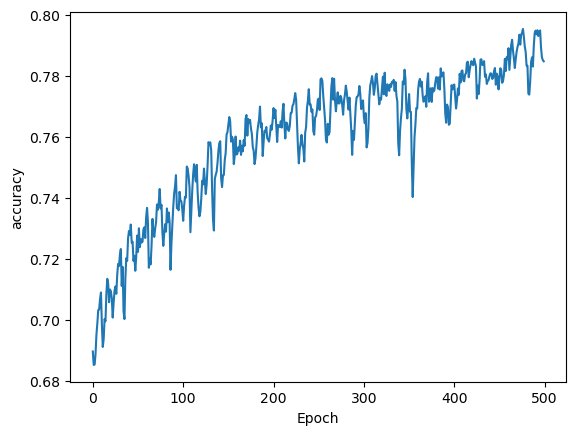

In [65]:
plot_graph(history, 'accuracy')

In [66]:
line = "My love for you will be unforgotten by the mankind"
no_of_words = 100
generate_poem(line, no_of_words)

1/1 [==============================] - 0s 19ms/step
My love for you will be unforgotten by the mankind that shall surely was last night thou plenty wild out shapes murther round kilgary mountain valley meadows dear thoughts face has taken such rings on kilgary mountain every valley which without quite had from venus mirror down from mythology into thayology when eer what variety down again at spirits hands poor begging row band blaze of gone city city city rings relations out wid along out wid along with faces ladies gardens flux flux even right leg through miss finnertys hoops self school'd self scann'd self honour'd self secure ballyjamesduff thorn mark what drinking find beads house companions out o
